In [1]:
# Load our word2vec model
import gensim
w2v_model = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_Health_and_Personal_Care_5.w2v")
print("Model loaded")

Model loaded


In [4]:
#Select 10000 words from our vocabulary
from __future__ import absolute_import, division, print_function
import numpy as np
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in w2v_model.vocab:
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (10000, 300)


In [5]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (10000, 2)


In [7]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")

Points DataFrame built


In [8]:
points.head(10)

,word,x,y
0,Caltrate,-0.387340,-3.068200
1,EXPLAIN,1.061346,5.968984
2,gah,-1.932750,-2.721255
3,fleeces,-1.957375,-1.193616
4,woods,0.815386,0.311998
5,clotted,-2.442221,-1.627136
6,spiders,0.918326,-3.206986
7,hanging,-5.397901,-0.974329
8,bromelain,2.858295,-3.092707
9,woody,-2.211243,-4.967640


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

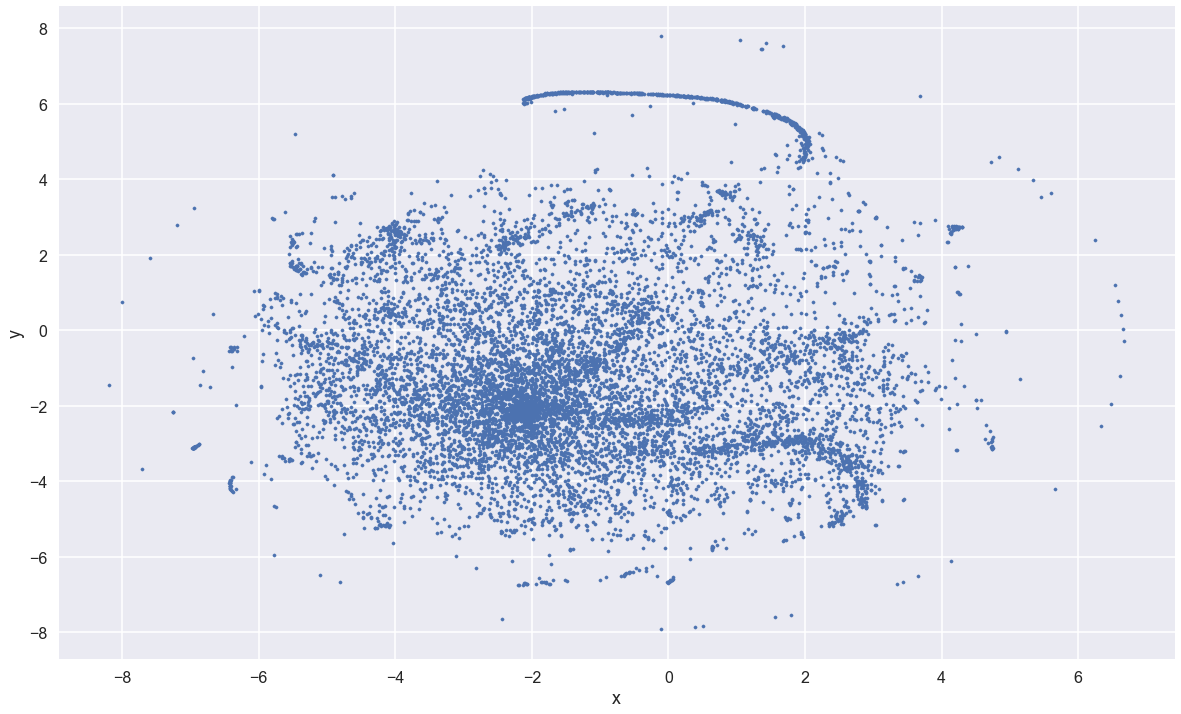

In [11]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [12]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

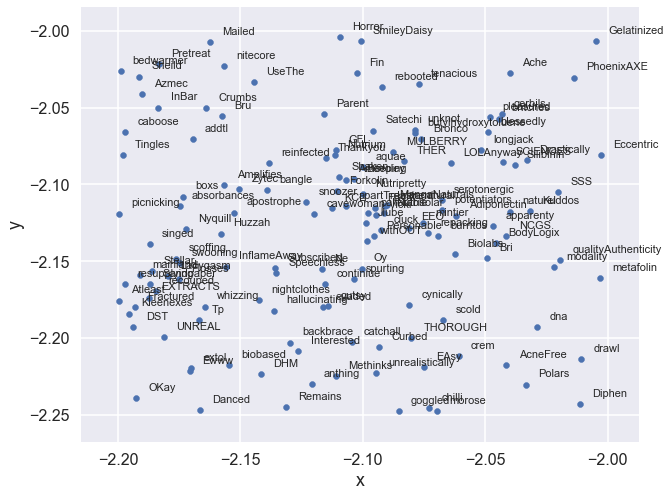

In [15]:
plot_region(x_bounds=(-2.2, -2.0), y_bounds=(-2.25, -2))

In [17]:
w2v_model.most_similar("blue")

[(u'purple', 0.714871883392334),
 (u'pink', 0.6893501281738281),
 (u'yellow', 0.6814635992050171),
 (u'colored', 0.6803042888641357),
 (u'color', 0.649885892868042),
 (u'black', 0.6452205181121826),
 (u'purplish', 0.6218446493148804),
 (u'grey', 0.6147855520248413),
 (u'magenta', 0.6066790223121643),
 (u'florescent', 0.5973138809204102)]